
### NOME: JONATHAN CITOLINO                   RA:082170019

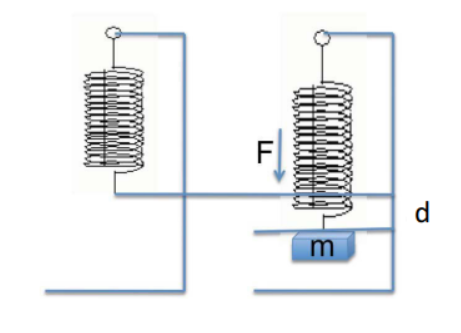 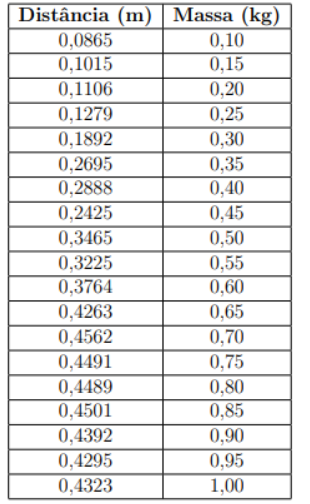



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## BASE DE DADOS

In [2]:
medicoes = {'Distância (m)':[0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562,0.4491,0.4489,0.4501,0.4392,0.4295,0.4323],
            'Massa (kg)':[0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]}#

In [3]:
# ADICIONANDO A COLUNA PESO EM NEWTONS
df = pd.DataFrame(medicoes)
df["Massa (kg)"] = df["Massa (kg)"]*9.8
rename = {"Massa (kg)":"Peso (N)"}
df = df.rename(columns = rename)
df

,Distância (m),Peso (N)
0,0.0865,0.98
1,0.1015,1.47
2,0.1106,1.96
3,0.1279,2.45
4,0.1892,2.94
5,0.2695,3.43
6,0.2888,3.92
7,0.2425,4.41
8,0.3465,4.90
9,0.3225,5.39


### ANÁLISE EXPLORATÓRIA DA BASE DE DADOS

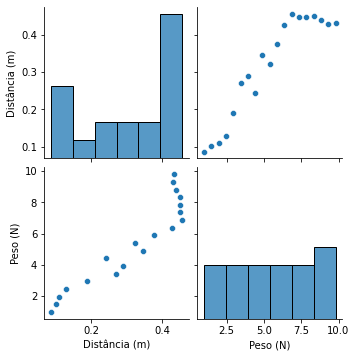

In [4]:
sns.set_palette('tab10')
sns.pairplot(df)

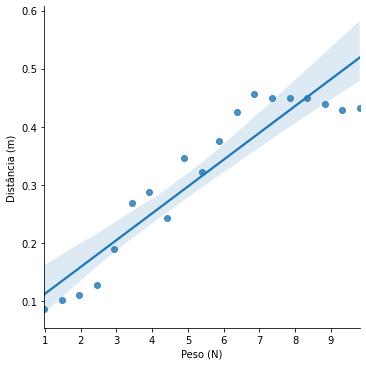

In [5]:
sns.lmplot(x='Peso (N)',y='Distância (m)',data=df)

## (10,0 pontos) um programa ou algoritmo escrito em Python (Jupyter Notebook), que implemente e informe o cálculo de k;


In [6]:
#USANDO A CLASSE TRAIN_TEST_SPLIT PARA DIVIDIR A BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split

x = df[["Peso (N)"]]
y = df["Distância (m)"]

np.random.seed(101) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


## MODELO DE APRENDIZAGEM

In [7]:
from sklearn.linear_model import LinearRegression


modelo = LinearRegression(fit_intercept =False) #treinar sem o intercept
#modelo = LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

## ANÁLISE DOS COEFICIENTES

In [8]:
# Coeficientes 'w' do modelo
obj = {"Coeficientes":modelo.coef_,"Features":x.columns}
dfCoeffecientes = pd.DataFrame(data=obj)
dfCoeffecientes=dfCoeffecientes.append({'Coeficientes' : modelo.intercept_ , 'Features' : "intercept"} , ignore_index=True)
dfCoeffecientes

,Coeficientes,Features
0,0.055884,Peso (N)
1,0.000000,intercept


## ESTIMANDO VALORES  E PLOTANDO NO GRÁFICO O AJUSTE LINEAR

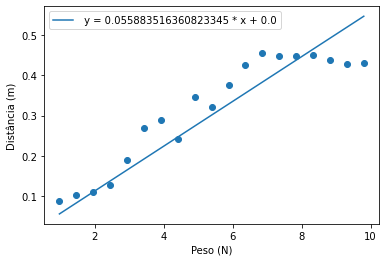

In [9]:
plt.scatter(x, y)
plt.xlabel('Peso (N)')
plt.ylabel('Distância (m)')
previsoes = modelo.predict(x)
plt.plot(x,previsoes,label = ' y = '+ str(modelo.coef_[0])+' * x + '+str(modelo.intercept_))
plt.legend(loc = 'best')

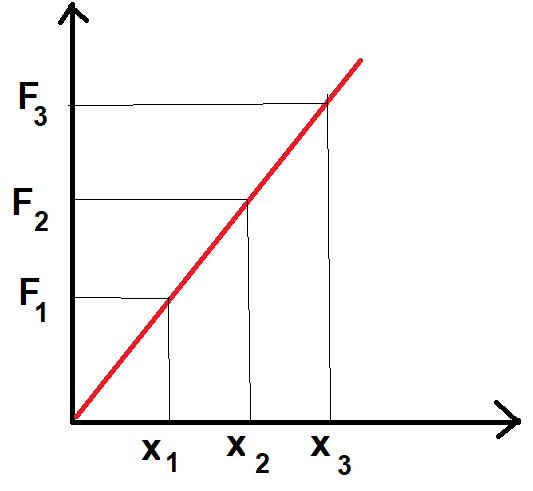

### FORMÚLA LEI DE HOOKE F = -KD
###  É possível perceber a presença de um sinal negativo, que indica que a força elástica apresenta sempre sentido oposto à deformação da mola

### | F | = KD

### LINEAR REGRESSION  Y = W1*X+W0  SE MEU W0 = 0 ENTÃO Y = W1*X
### MANIPULAÇÃO
### Y = D  E X = F ENTÃO
### D = W1 * F
### D = W1 * K * D
### 1 = W1 * K
### 1/W1 = K
### RESPOSTA:

In [10]:
print("O valor para a constante elástica(K) tem seu valor estimado em: ",1/modelo.coef_[0] , "N/m")

O valor para a constante elástica(K) tem seu valor estimado em:  17.89436429775277 N/m


## MÉTRICAS PARA VALIDAÇÃO DO MODELO

In [11]:
prediction = modelo.predict(x_test)
print("coeficiente de determinação R²: ", modelo.score(x_test, y_test))


coeficiente de determinação R²:  0.9833019490875653


In [12]:
from sklearn import metrics

print('MAE (erro médio absoluto):', metrics.mean_absolute_error(y_test, prediction))
print('MSE (erro quadrático médio):', metrics.mean_squared_error(y_test, prediction))
print('RMSE (Raiz do erro quadrático médio):', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE (erro médio absoluto): 0.014388307932786244
MSE (erro quadrático médio): 0.000315998751222459
RMSE (Raiz do erro quadrático médio): 0.017776353709983917
